# Image Classification Using SVM

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import io, exposure
import glob
import re
import pandas as pd
from sklearn.utils import Bunch
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## Load data and return a structured dataset

In [3]:
train_csv = pd.read_csv("./data/TrainAnnotations.csv")
def load_images(path):
    files = glob.glob(path + "*.jpg")
    images = []
    hsv_data = []
    file_name = []
    annotations =[]
    
    for file in files:
        name = re.sub("./data/TrainData/", "", file)
        image = cv2.imread(file)
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)[:,:,0]  # extract Hue channel only

        for rows in train_csv.iterrows():
            if rows[1].file_name == name:
                annotation = rows[1].annotation
                annotations.append(annotation)
        
        file_name.append(name)
        images.append(image)
        hsv_data.append(hsv.flatten())
        
        
        
    
    file_name = np.array(file_name)
    images = np.array(images)
    hsv_data = np.array(hsv_data) 
    annotations = np.array(annotations)
    
    return Bunch(file_name = file_name,
                images = images,
                hsv_data = hsv_data,
                annotations = annotations)
        

In [4]:
image_dataset = load_images("./data/TrainData/")

## Split Data into Train and Test

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.hsv_data, image_dataset.annotations, test_size=0.3,random_state=109)

In [70]:
print(X_train.shape)
print(X_test.shape)

(717, 307200)
(308, 307200)


## SVM classifier using Linear, RBF, and Poly kernels

In [71]:
classification_reports = []
mods_acc = []
for kernel in ('linear', 'poly', 'rbf'):
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    # predict test data
    y_pred = clf.predict(X_test)
    # save diagnostics
    classification_reports.append(classification_report(y_test, y_pred))
    # save test accuracy
    mods_acc.append(accuracy_score(y_test, y_pred))

/Users/anhnguyen/anaconda3/envs/mainCV/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/anhnguyen/anaconda3/envs/mainCV/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/anhnguyen/anaconda3/envs/mainCV/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Linear model results

In [73]:
print(mods_acc[0])
print(classification_reports[0])

0.788961038961039
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       135
           1       0.65      0.57      0.61        56
           2       0.79      0.61      0.69        44
           3       0.94      0.71      0.81        42
           4       0.97      0.94      0.95        31

   micro avg       0.79      0.79      0.79       308
   macro avg       0.82      0.75      0.78       308
weighted avg       0.79      0.79      0.78       308



### Polynomial model results

In [74]:
print(mods_acc[1])
print(classification_reports[1])

0.711038961038961
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       135
           1       0.54      0.45      0.49        56
           2       0.62      0.52      0.57        44
           3       0.90      0.64      0.75        42
           4       0.97      0.90      0.93        31

   micro avg       0.71      0.71      0.71       308
   macro avg       0.75      0.67      0.70       308
weighted avg       0.71      0.71      0.70       308



### RBF model results

In [75]:
print(mods_acc[2])
print(classification_reports[2])

0.4383116883116883
              precision    recall  f1-score   support

           0       0.44      1.00      0.61       135
           1       0.00      0.00      0.00        56
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00        42
           4       0.00      0.00      0.00        31

   micro avg       0.44      0.44      0.44       308
   macro avg       0.09      0.20      0.12       308
weighted avg       0.19      0.44      0.27       308



# Random Forest classifier

In [79]:
forest_reports = []
forest_acc = []
for n_estimator in (100, 300, 500, 700):
    clf = RandomForestClassifier(n_estimators=n_estimator, 
                               random_state=109, 
                               max_features = 'sqrt',
                               n_jobs=-1)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    forest_reports.append(classification_report(y_test, y_pred))
    forest_acc.append(accuracy_score(y_test, y_pred))

### forest with 100 trees

In [80]:
print(forest_acc[0])
print(forest_reports[0])

0.6623376623376623
              precision    recall  f1-score   support

           0       0.65      0.96      0.77       135
           1       0.42      0.25      0.31        56
           2       0.90      0.20      0.33        44
           3       0.67      0.57      0.62        42
           4       0.90      0.90      0.90        31

   micro avg       0.66      0.66      0.66       308
   macro avg       0.71      0.58      0.59       308
weighted avg       0.67      0.66      0.62       308



### forest with 300 trees

In [81]:
print(forest_acc[1])
print(forest_reports[1])

0.685064935064935
              precision    recall  f1-score   support

           0       0.66      0.96      0.78       135
           1       0.47      0.25      0.33        56
           2       0.91      0.23      0.36        44
           3       0.72      0.69      0.71        42
           4       0.93      0.90      0.92        31

   micro avg       0.69      0.69      0.69       308
   macro avg       0.74      0.61      0.62       308
weighted avg       0.70      0.69      0.64       308



### forest with 500 trees

In [82]:
print(forest_acc[2])
print(forest_reports[2])

0.6818181818181818
              precision    recall  f1-score   support

           0       0.65      0.96      0.78       135
           1       0.45      0.25      0.32        56
           2       1.00      0.23      0.37        44
           3       0.76      0.67      0.71        42
           4       0.93      0.90      0.92        31

   micro avg       0.68      0.68      0.68       308
   macro avg       0.76      0.60      0.62       308
weighted avg       0.71      0.68      0.64       308



### forest with 700 trees

In [83]:
print(forest_acc[3])
print(forest_reports[3])

0.6753246753246753
              precision    recall  f1-score   support

           0       0.64      0.96      0.77       135
           1       0.43      0.23      0.30        56
           2       1.00      0.23      0.37        44
           3       0.75      0.64      0.69        42
           4       0.93      0.90      0.92        31

   micro avg       0.68      0.68      0.68       308
   macro avg       0.75      0.59      0.61       308
weighted avg       0.70      0.68      0.63       308



# Train SVM linear kernel model (best performing)

In [84]:
clf_opt = SVC(kernel='linear')
clf_opt.fit(image_dataset.hsv_data, image_dataset.annotations)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### 5-fold cross-validation of the SVM linear model

In [85]:
scores = cross_val_score(clf_opt, image_dataset.hsv_data, image_dataset.annotations, cv=5)
scores

array([0.79710145, 0.76585366, 0.8097561 , 0.81372549, 0.76470588])

In [86]:
np.mean(scores)

0.7902285155843887

# Plots
* various plots to compare model's performance
* model performance extracted from classification reports

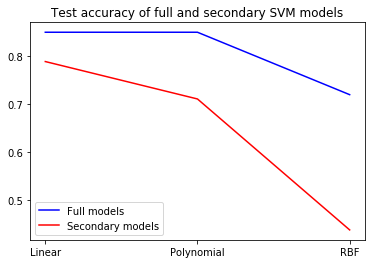

In [10]:
# compares full and secondary SVM models
# because I don't want to rerun the model; hand-fill the results here
forest_acc = [0.6623376623376623, 0.685064935064935, 0.6818181818181818, 0.6753246753246753]
mods_acc = [0.788961038961039, 0.711038961038961, 0.4383116883116883]  # SVM models
svm_perf = [0.85, 0.85, 0.72]
forest_perf = [0.70, 0.70, 0.71, 0.71]
ntrees = [100,300,500,700]
models = ["Linear", "Polynomial", "RBF"]

plt.plot(models, svm_perf, "b-", models, mods_acc, "r-")
plt.title("Test accuracy of full and secondary SVM models")
plt.legend(("Full models", "Secondary models"))
plt.show()

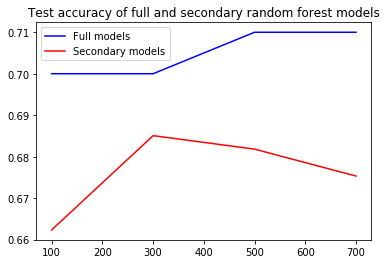

In [11]:
# compare full and secondary random forest models
plt.plot(ntrees, forest_perf, "b-", ntrees, forest_acc, "r-")
plt.title("Test accuracy of full and secondary random forest models")
plt.legend(("Full models", "Secondary models"))
plt.show()